In [1]:
import pandas as pd
from pathlib import Path

def read_output_files(dirs):
    files = []
    for d in dirs:
        files.extend(Path(d).glob('*/*.csv'))

    scores_all = []

    for f in files:
        df = pd.read_csv(f)
        df['dir'] = str(Path(f).parent)
        scores_all.append(df)

    return pd.concat(scores_all)


In [2]:
output_dirs = ['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f1', \
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f2', \
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f3']

output_dirs_norm = ['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm_k20_f1', \
                    '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm_k20_f2', \
                    '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm_k20_f3', \
                    '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm_k20_f4']

output_dirs_norm2 = ['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k20_f1', \
                     '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k20_f2', \
                    '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k20_f3', \
                    '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k20_f4']

output_dirs_norm2b = ['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k15_f1', \
                      '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k15_f2', \
                      '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k15_f4', \
                      '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k20_f1', \
                      '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k20_f2', \
                      '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_norm2_k20_f4']


In [3]:
df = read_output_files(output_dirs)
print(df['dir'].unique())
print(df['fset'].unique())
print(df['cv'].unique())
print('repeats: ' + str(df['repeat'].max()))
df.head()

['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f1/202204221637'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f1/202204251132'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f1/202204261147'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f2/202204251134'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f2/202204211541'
 '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k15_f3/202204221633']
['f_mot' 'f_mot_morph' 'f_mot_morph_dyn']
['StratifiedGroupKFold(n_splits=4, random_state=None, shuffle=True)']
repeats: 20


,accuracy,precision,recall,f1,classifier,kernel_size,epochs,repeat,cv,fset,dir
0,0.478261,0.461538,0.352941,0.400000,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...
1,0.506667,0.521739,0.315789,0.393443,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...
2,0.521739,0.600000,0.250000,0.352941,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...
3,0.539474,0.666667,0.444444,0.533333,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...
4,0.549296,0.555556,0.897436,0.686275,InceptionTime,20,10,2,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,/proj/hajaalin/Projects/n_track_ML/output/cros...


In [4]:
#df.groupby('epochs')['accuracy'].mean()
grp = df.groupby(['fset','epochs'])['accuracy'].agg(['mean','std']).reset_index()
grp.head()

,fset,epochs,mean,std
0,f_mot,10,0.516647,0.055945
1,f_mot,20,0.506764,0.060415
2,f_mot,30,0.514310,0.072176
3,f_mot,40,0.516203,0.058688
4,f_mot,50,0.513386,0.059481


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-3ncne2wr because the default path (/home/hajaalin/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


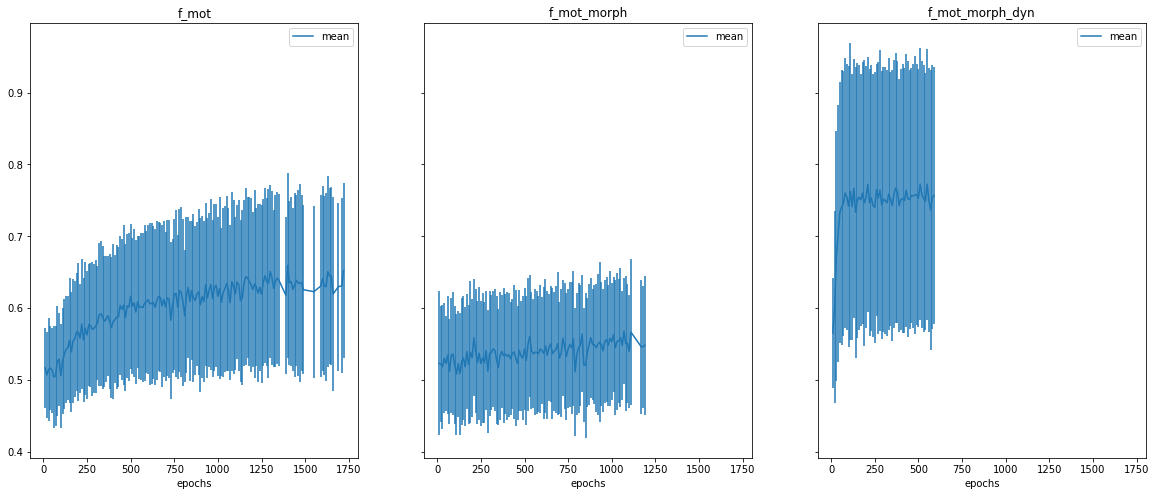

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
fig.set_size_inches(20,8)
i=0
for fset in grp['fset'].unique():
    #print(fset)

    grp[grp['fset']==fset].plot('epochs', yerr='std', label='mean', title=fset, ax=axs[i])
    i = i+1
    

In [6]:
grp[grp['fset']=='f_mot'].tail()

,fset,epochs,mean,std
153,f_mot,1650,0.644882,0.123928
154,f_mot,1660,0.619505,0.135065
155,f_mot,1690,0.629533,0.117479
156,f_mot,1710,0.631052,0.122238
157,f_mot,1720,0.652208,0.121422


In [7]:
grp[grp['fset']=='f_mot_morph_dyn'].tail()

,fset,epochs,mean,std
326,f_mot_morph_dyn,550,0.772559,0.188804
327,f_mot_morph_dyn,560,0.750491,0.183274
328,f_mot_morph_dyn,570,0.736655,0.194573
329,f_mot_morph_dyn,580,0.754422,0.183710
330,f_mot_morph_dyn,590,0.756710,0.178427


In [8]:
dfn = read_output_files(output_dirs_norm)
dfn.head()


,accuracy,precision,recall,f1,classifier,kernel_size,epochs,repeat,cv,fset,job_id,dir
0,0.527778,0.575000,0.575000,0.575000,InceptionTime,20,100,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270863424,/proj/hajaalin/Projects/n_track_ML/output/cros...
1,0.864865,0.928571,0.847826,0.886364,InceptionTime,20,100,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270863424,/proj/hajaalin/Projects/n_track_ML/output/cros...
2,1.000000,1.000000,1.000000,1.000000,InceptionTime,20,100,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270863424,/proj/hajaalin/Projects/n_track_ML/output/cros...
3,0.958904,0.892857,1.000000,0.943396,InceptionTime,20,100,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270863424,/proj/hajaalin/Projects/n_track_ML/output/cros...
4,0.449275,0.468085,0.628571,0.536585,InceptionTime,20,100,2,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270863424,/proj/hajaalin/Projects/n_track_ML/output/cros...


In [9]:

grp = dfn.groupby(['fset','epochs'])['accuracy'].agg(['mean','std']).reset_index()
grp.head()

,fset,epochs,mean,std
0,f_mot,100,0.805768,0.197606
1,f_mot,120,0.796668,0.193545
2,f_mot,140,0.803788,0.194655
3,f_mot,160,0.801145,0.200553
4,f_mot,180,0.803455,0.190394


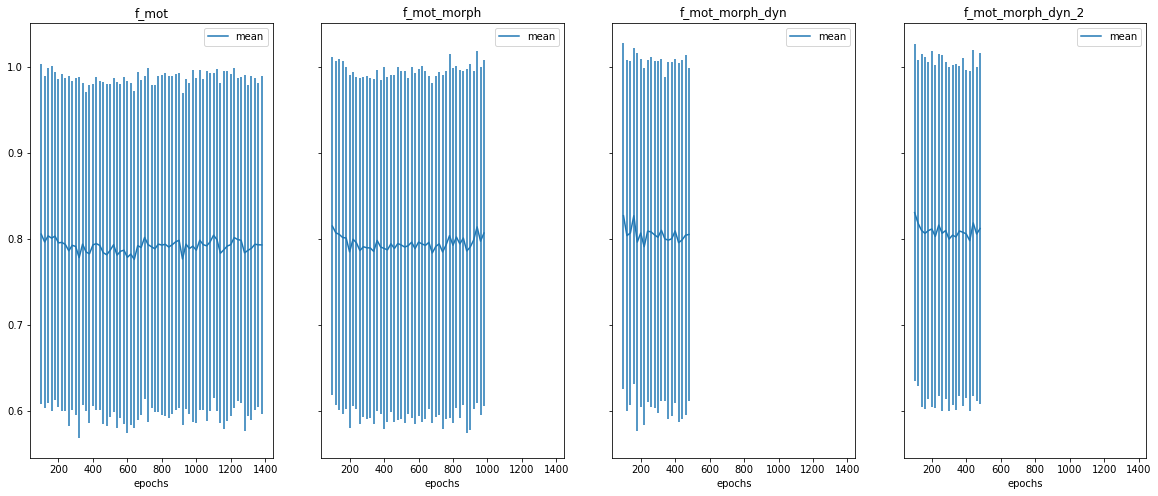

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)
fig.set_size_inches(20,8)
i=0
for fset in grp['fset'].unique():
    #print(fset)

    grp[grp['fset']==fset].plot('epochs', yerr='std', label='mean', title=fset, ax=axs[i])
    i = i+1
    

In [11]:
dfn2 = read_output_files(output_dirs_norm2)
dfn2.head()


,accuracy,precision,recall,f1,classifier,kernel_size,epochs,repeat,cv,fset,job_id,dir
0,0.527027,0.460000,0.741935,0.567901,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270882167,/proj/hajaalin/Projects/n_track_ML/output/cros...
1,0.753623,0.820513,0.761905,0.790123,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270882167,/proj/hajaalin/Projects/n_track_ML/output/cros...
2,0.828571,0.925926,0.714286,0.806452,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270882167,/proj/hajaalin/Projects/n_track_ML/output/cros...
3,0.894737,0.951220,0.866667,0.906977,InceptionTime,20,10,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270882167,/proj/hajaalin/Projects/n_track_ML/output/cros...
4,0.449275,0.517241,0.384615,0.441176,InceptionTime,20,10,2,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270882167,/proj/hajaalin/Projects/n_track_ML/output/cros...


In [12]:

grp = dfn2.groupby(['fset','epochs'])['accuracy'].agg(['mean','std']).reset_index()
grp.head()

,fset,epochs,mean,std
0,f_mot,2,0.709060,0.147442
1,f_mot,4,0.763876,0.165511
2,f_mot,6,0.782818,0.178726
3,f_mot,8,0.790960,0.179674
4,f_mot,10,0.791288,0.184567


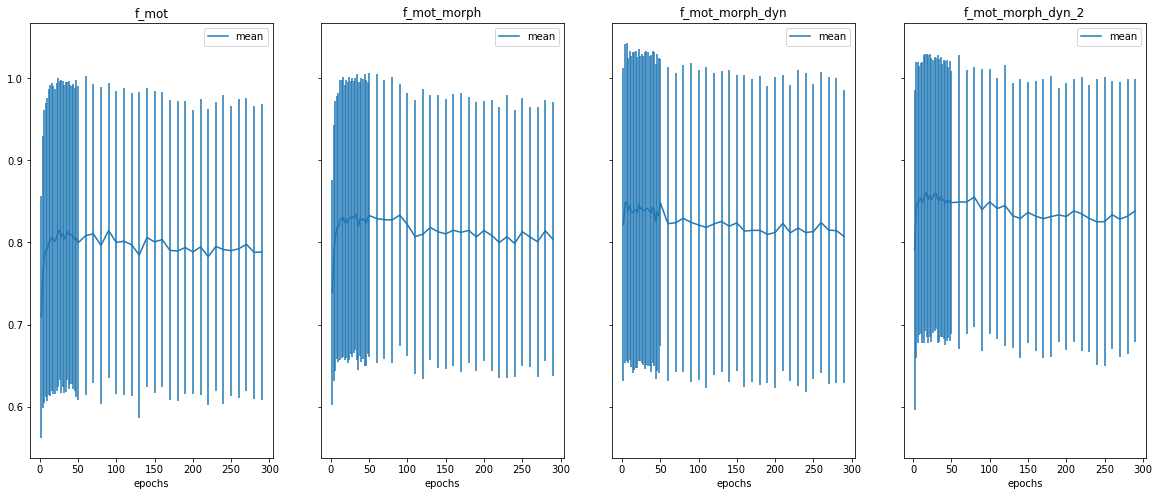

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)
fig.set_size_inches(20,8)
i=0
for fset in grp['fset'].unique():
    #print(fset)

    grp[grp['fset']==fset].plot('epochs', yerr='std', label='mean', title=fset, ax=axs[i])
    i = i+1
    

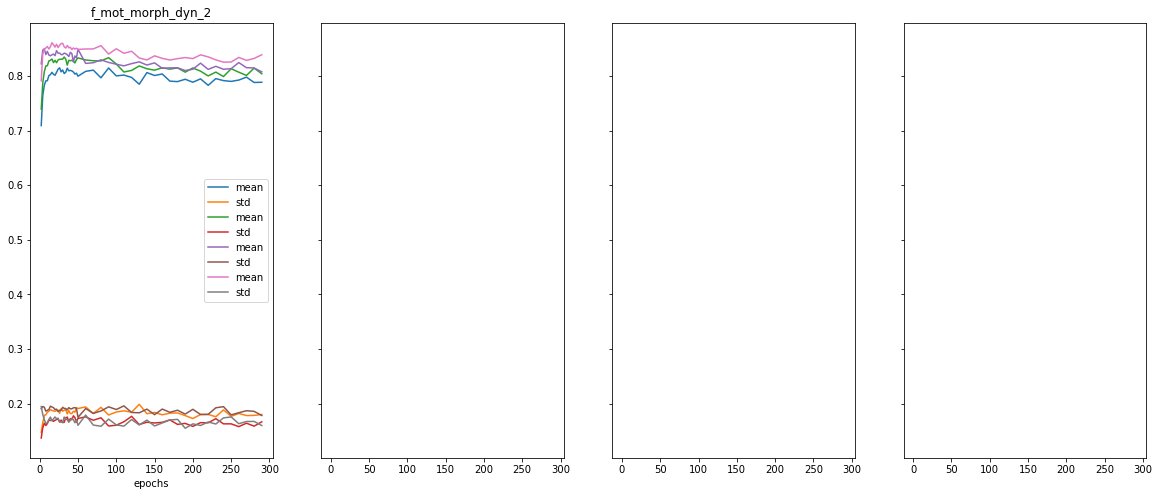

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,4, sharex=True, sharey=True)
fig.set_size_inches(20,8)
i=0
for fset in grp['fset'].unique():
    #print(fset)

    grp[grp['fset']==fset].plot('epochs', yerr=None, label='mean', title=fset, ax=axs[i])
    #i = i+1
    

In [15]:
dfn2b = read_output_files(output_dirs_norm2b)
dfn2b = dfn2b[dfn2b['epochs']<=80]
dfn2b.head()


,accuracy,precision,recall,f1,classifier,kernel_size,epochs,repeat,cv,fset,job_id,dir
0,0.472973,0.392857,0.333333,0.360656,InceptionTime,15,14,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270929194,/proj/hajaalin/Projects/n_track_ML/output/cros...
1,0.957143,0.971429,0.944444,0.957746,InceptionTime,15,14,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270929194,/proj/hajaalin/Projects/n_track_ML/output/cros...
2,0.944444,0.974359,0.926829,0.950000,InceptionTime,15,14,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270929194,/proj/hajaalin/Projects/n_track_ML/output/cros...
3,1.000000,1.000000,1.000000,1.000000,InceptionTime,15,14,1,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270929194,/proj/hajaalin/Projects/n_track_ML/output/cros...
4,0.591549,0.627907,0.675000,0.650602,InceptionTime,15,14,2,"StratifiedGroupKFold(n_splits=4, random_state=...",f_mot,270929194,/proj/hajaalin/Projects/n_track_ML/output/cros...


In [16]:
grp = dfn2b.groupby(['kernel_size','fset','epochs'])['accuracy'].agg(['mean','std'])#.reset_index()
grp = grp.reset_index(level=2)
grp.head()

epochs      mean       std
kernel_size fset                             
15          f_mot       2  0.730012  0.148690
            f_mot       4  0.775417  0.168128
            f_mot       6  0.789487  0.178265
            f_mot       8  0.796352  0.187047
            f_mot      10  0.800318  0.182346

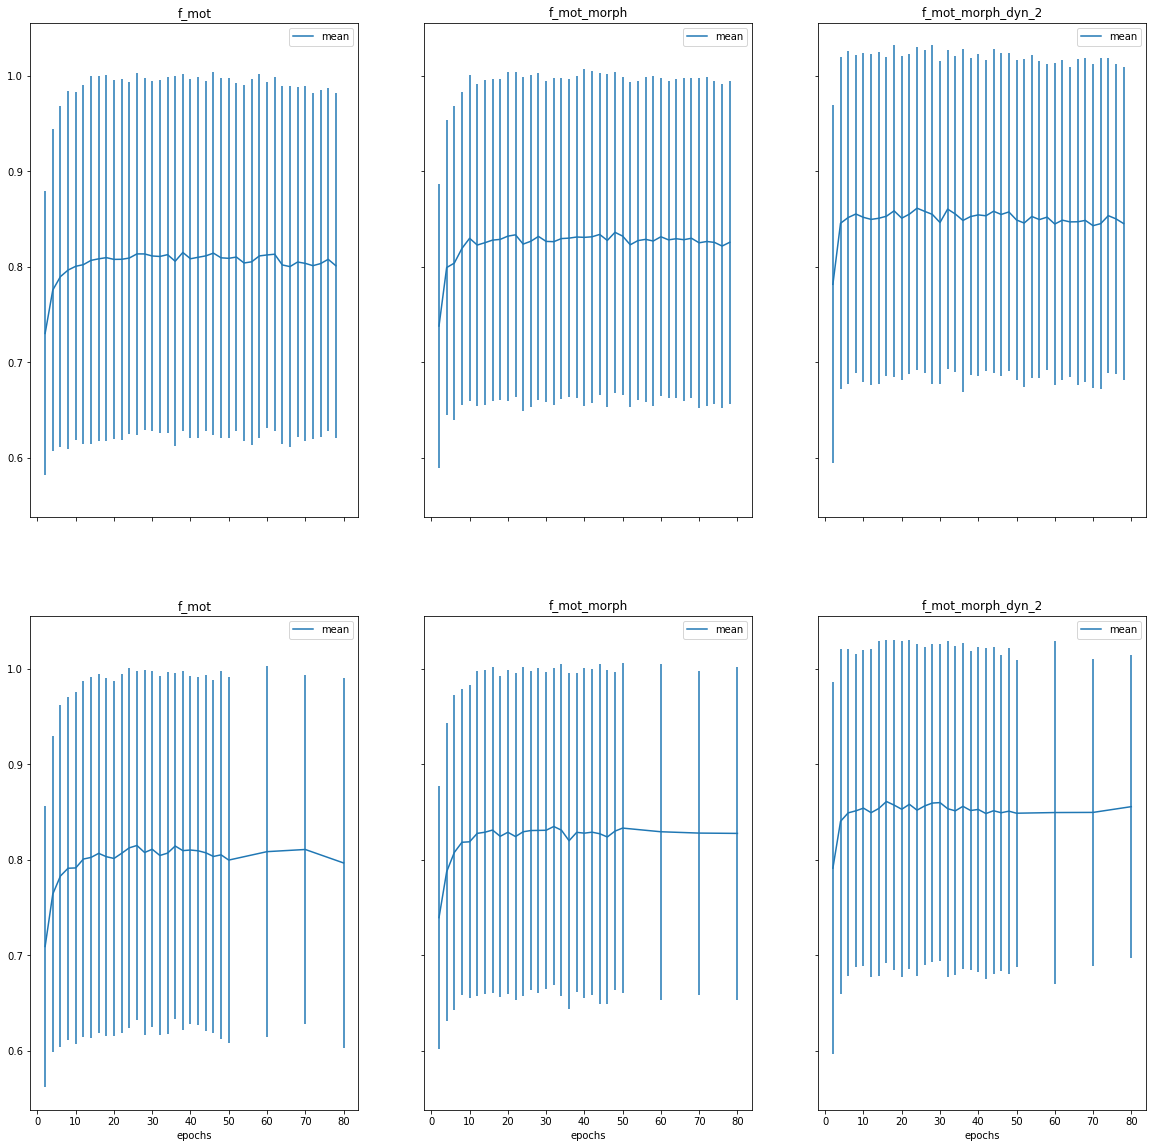

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,3, sharex=True, sharey=True)
fig.set_size_inches(20,20)
i=0
for kernel_size in grp.index.get_level_values('kernel_size').unique(): #grp['kernel_size'].unique():
    #print(kernel_size)
    j=0
    for fset in grp.index.get_level_values('fset').unique(): #['fset'].unique():  
        #print(fset)
        #subgrp = grp[(grp['fset']==fset) & (grp['kernel_size']==kernel_size)]
        subgrp = grp.loc[kernel_size,fset]
        #print(subgrp.head(2))
        subgrp.plot('epochs', yerr='std', label='mean', title=fset, ax=axs[i,j])
        j = j+1
    i = i+1
    

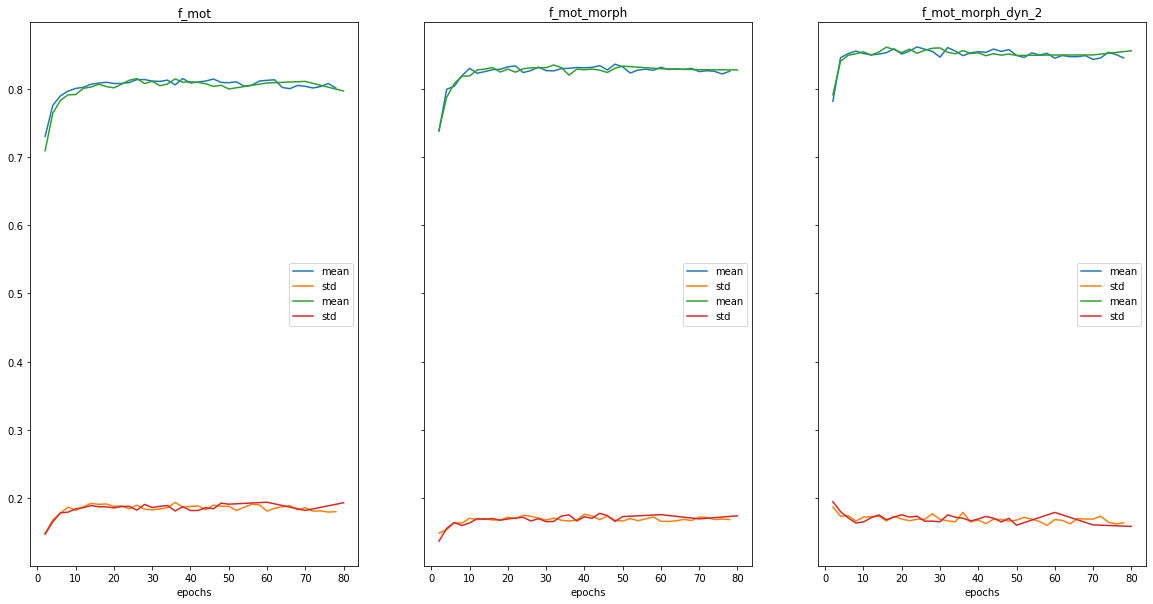

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
fig.set_size_inches(20,10)
i=0
for kernel_size in grp.index.get_level_values('kernel_size').unique(): #grp['kernel_size'].unique():
    #print(kernel_size)
    j=0
    for fset in grp.index.get_level_values('fset').unique(): #['fset'].unique():  
        #print(fset)
        #subgrp = grp[(grp['fset']==fset) & (grp['kernel_size']==kernel_size)]
        subgrp = grp.loc[kernel_size,fset]
        #print(subgrp.head(2))
        subgrp.plot('epochs', yerr=None, label='mean', title=fset, ax=axs[j])
        j = j+1
    #i = i+1
    

[240 320  80]
                   epochs  count
fset                            
f_mot                   2    240
f_mot                   4    240
f_mot                   6    240
f_mot                   8    240
f_mot                  10    320
...                   ...    ...
f_mot_morph_dyn_2     250     80
f_mot_morph_dyn_2     260     80
f_mot_morph_dyn_2     270     80
f_mot_morph_dyn_2     280     80
f_mot_morph_dyn_2     290     80

[147 rows x 2 columns]


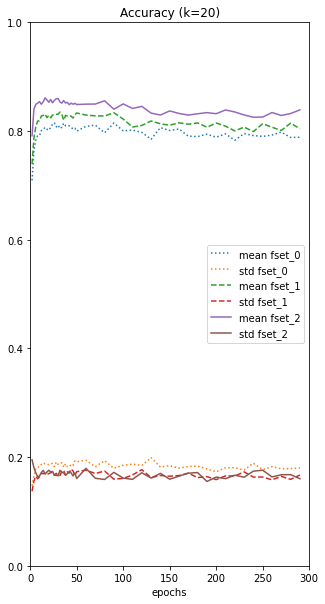

In [73]:
#
## For ELMI poster
#
plot_dir = Path('/proj/hajaalin/Projects/n_track_ML/output/images')

dfn2b = read_output_files(output_dirs_norm2b)
grp = dfn2b.groupby(['kernel_size','fset','epochs'])['accuracy'].agg(['mean','std','count'])#.reset_index()
grp = grp.reset_index(level=2)
grp.head()

# document the number of repetitions
grp.loc[15][['epochs','count']].to_csv(plot_dir / 'epochs_count_k15.csv')
grp.loc[20][['epochs','count']].to_csv(plot_dir / 'epochs_count_k20.csv')

# copy data in a new dataframe, separate feature sets
ddd = pd.DataFrame()

# only k20 was tested until 300 epochs
fsets = ['f_mot','f_mot_morph', 'f_mot_morph_dyn_2']
for i in range(len(fsets)):
    ddd['epochs_'+str(i)] = pd.Series(grp.loc[20,fsets[i]]['epochs'].values)
    ddd['mean fset_'+str(i)] = pd.Series(grp.loc[20,fsets[i]]['mean'].values)
    ddd['std fset_'+str(i)] = pd.Series(grp.loc[20,fsets[i]]['std'].values)
    
# check that epochs are the same for all feature sets
test = ~((ddd['epochs_0'] == ddd['epochs_1']) & (ddd['epochs_1'] == ddd['epochs_2']))
#print(ddd[test].shape)
assert ddd[test].shape[0] == 0

ddd['epochs'] = ddd['epochs_0']
ddd.drop(columns=['epochs_0','epochs_1','epochs_2'], inplace=True)
#print(ddd.head())

fig = plt.figure()
fig.add_subplot()
ax = fig.axes

style = {'mean fset_0':':','std fset_0':':','mean fset_1':'--','std fset_1':'--','mean fset_2':'-','std fset_2':'-',}
ddd.plot('epochs', title='Accuracy (k=20)', xlim=(0,300), ylim=(0,1), figsize=(5,10), style=style, ax=ax[0])
plot_dir.mkdir(exist_ok=True)
plt.savefig(plot_dir / 'accuracy_k20.png')

In [29]:
output_dirs_sep = ['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k20_fset_x', \
                   '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k20_fset_y', \
                   '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k20_fset_xy', \
                   '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k20_fset_mindist', \
                   '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k20_fset_morph', \
                   '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k20_fset_area', \
                   '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k20_fset_perim']
                   
dfn2b = read_output_files(output_dirs_sep)
grp = dfn2b.groupby(['kernel_size','fset','epochs'])['accuracy'].agg(['mean','std'])#.reset_index()
grp = grp.reset_index(level=2)

In [30]:
grp.index.unique()

MultiIndex([(20,    'f_area'),
            (20, 'f_mindist'),
            (20,   'f_morph'),
            (20,   'f_perim'),
            (20,       'f_x'),
            (20,      'f_xy'),
            (20,       'f_y')],
           names=['kernel_size', 'fset'])

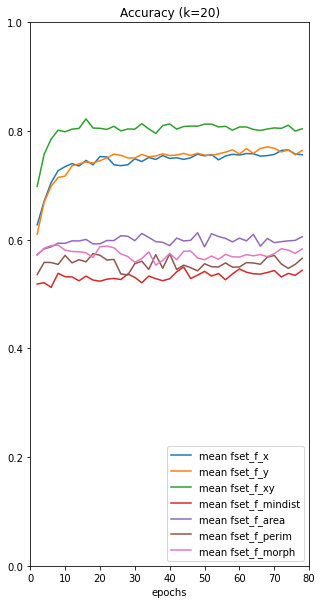

In [31]:
# copy data in a new dataframe, separate feature sets
ddd = pd.DataFrame()

# only k20 was tested until 300 epochs
fsets = ['f_x','f_y','f_xy','f_mindist','f_area', 'f_perim','f_morph']
for i in range(len(fsets)):
    ddd['epochs_'+fsets[i]] = pd.Series(grp.loc[20,fsets[i]]['epochs'].values)
    ddd['mean fset_'+fsets[i]] = pd.Series(grp.loc[20,fsets[i]]['mean'].values)
    #ddd['std fset_'+fsets[i]] = pd.Series(grp.loc[20,fsets[i]]['std'].values)
    
# check that epochs are the same for all feature sets
test = ~((ddd['epochs_f_x'] == ddd['epochs_f_morph']) & (ddd['epochs_f_morph'] == ddd['epochs_f_area']))
#print(ddd[test].shape)
assert ddd[test].shape[0] == 0

ddd['epochs'] = ddd['epochs_f_x']
for f in fsets:
    ddd.drop(columns=['epochs_' + f], inplace=True)
#print(ddd.head())

fig = plt.figure()
fig.add_subplot()
ax = fig.axes

#ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
#          ncol=2, fancybox=True, shadow=True)


#style = {'mean fset_f_x':':','std fset_f_x':':','mean fset_f_y':'--','std fset_f_y':'--','mean fset_f_morph':'-','std fset_f_morph':'-',}
#ddd.plot('epochs', title='Accuracy (k=20)', xlim=(0,80), ylim=(0,1), figsize=(5,10), style=style, ax=ax[0])
ddd.plot('epochs', title='Accuracy (k=20)', xlim=(0,80), ylim=(0,1), figsize=(5,10), ax=ax[0]).legend(loc='lower right')


In [18]:
ddd.head()

,mean fset_0,std fset_0,mean fset_1,std fset_1,mean fset_2,std fset_2,epochs_3,mean fset_3,std fset_3,epochs_4,mean fset_4,std fset_4,epochs
0,0.627061,0.093407,0.609914,0.100302,0.572582,0.087628,2,0.535557,0.092108,2,0.571340,0.097125,2
1,0.670712,0.115291,0.668861,0.124035,0.582930,0.095656,4,0.558176,0.086918,4,0.584215,0.097876,4
2,0.704891,0.150846,0.698159,0.152015,0.586705,0.090178,6,0.557886,0.083753,6,0.588968,0.082416,6
3,0.726779,0.146365,0.714315,0.150475,0.593516,0.092582,8,0.554458,0.086626,8,0.589843,0.085568,8
4,0.734391,0.147334,0.716905,0.164360,0.593214,0.072667,10,0.571024,0.083158,10,0.580711,0.084693,10


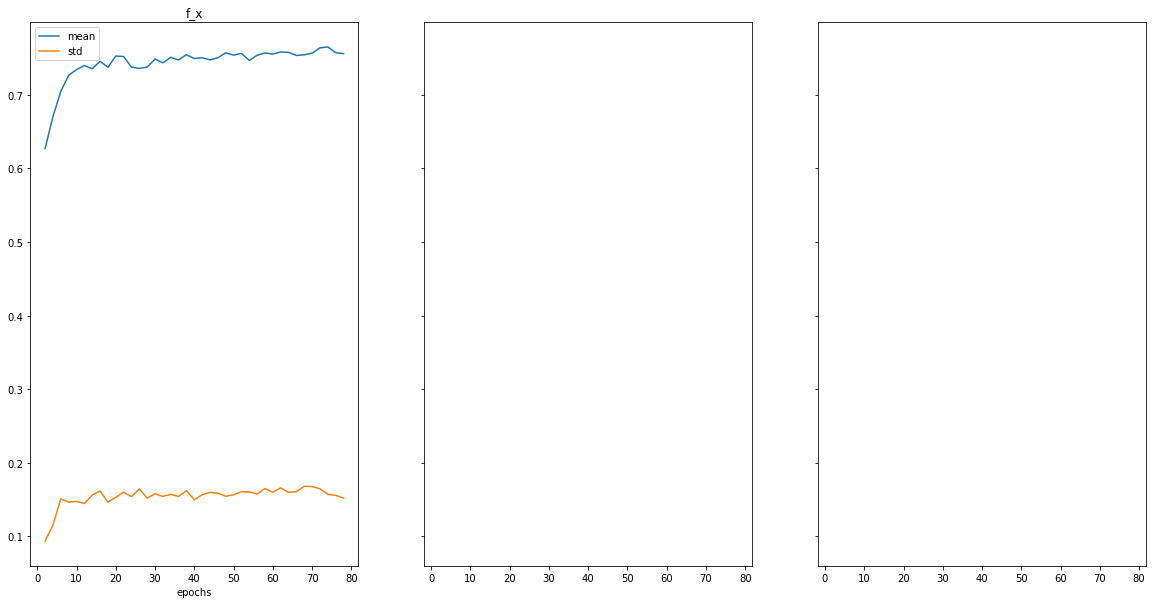

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3, sharex=True, sharey=True)
fig.set_size_inches(20,10)
i=0
for kernel_size in grp.index.get_level_values('kernel_size').unique(): #grp['kernel_size'].unique():
    #print(kernel_size)
    j=0
    for fset in grp.index.get_level_values('fset').unique(): #['fset'].unique():  
        #print(fset)
        #subgrp = grp[(grp['fset']==fset) & (grp['kernel_size']==kernel_size)]
        subgrp = grp.loc[kernel_size,fset]
        #print(subgrp.head(2))
        subgrp.plot('epochs', yerr=None, label='mean', title=fset, ax=axs[j])
        j = j+1
    #i = i+1
    